# **Crimes in India Analysis**

> Crime in India has been recorded since the British Raj, with comprehensive statistics now compiled annually by the National Crime Records Bureau(NCRB), under the Ministry of Home Affairs(MHA).

> As of **2018**, a total of **50,74,634** cognizable crimes comprising **31,32,954** Indian Penal Code (IPC) crimes and **19,41,680** Special & Local Laws (SLL) crimes were registered nationwide. Despite showing a **1.3%** annual increase in the registration of cases (**50,07,044** cases), the crime rate per 100,000 population has slightly come down from **388.6** in 2017 to **383.5** in 2018

> This notebook comprises of various facts and infographics about different types of crimes that have taken place in India since the past **18** years (2001-2018)

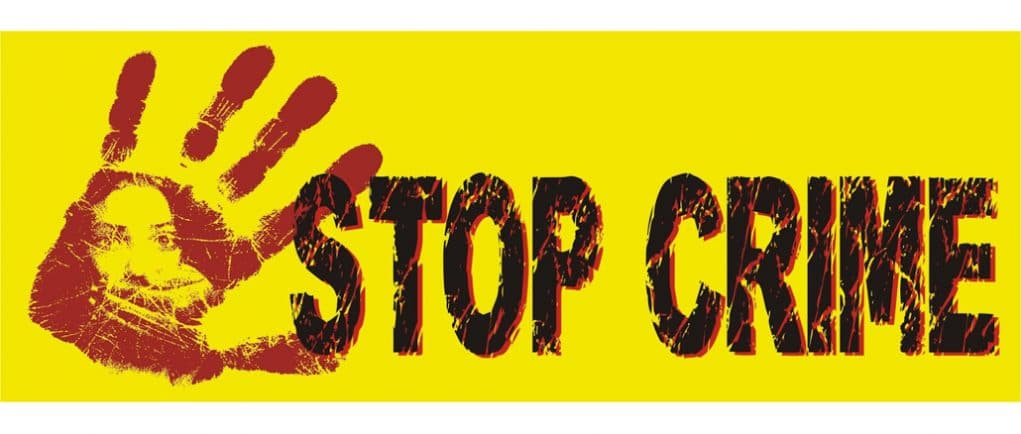

### Table of Contents

* [Rape cases](#chapter1)
    * [Incest rape cases reported](#section_1_1)
    * [State/UT wise incest rape cases reported](#section_1_2)
    * [Distribution of age groups of victims](#section_1_3)
    ___
* [Human Rights violation by the Police](#chapter2)
    * [State/UT wise cases registered under Human Rights violation](#section_2_1)
    * [Cases registered against Police under Human Rights violation](#section_2_2)
    * [Types of Human Rights violations](#section_2_3)
    * [Cases Registed under Human Rights Violation -  Fake encounter killings](#section_2_4)
    * [Cases Registed under Human Rights Violation -  False implication](#section_2_4_1)
    * [Policemen Chargesheeted vs Policemen Convicted](#section_2_5)
    ---
* [Auto Theft cases](#chapter3)
    * [State/UT wise number of vehicles stolen from 2001 to 2010](#section_3_1)
    * [Proportion of vehicles stolen, traced and recovered](#section_3_2)
    * [Year wise vehicles stolen](#section_3_3)
    * [Types of vehicles stolen](#section_3_4)
    * [Top 10 States/UT with highest number of motor cycles stolen](#section_3_5)
    ---
* [Property Theft cases](#chapter4)
    * [State/UT wise number of property stolen cases from 2001 to 2010](#section_4_1)
    * [Types of property stolen cases](#section_4_2)
    * [Property stolen vs recovered](#section_4_3)
    * [Year-wise Value of Property Stolen and Recovered](#section_4_4)

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [2]:
victims = pd.read_csv('../input/crime-in-india/20_Victims_of_rape.csv')
police_hr = pd.read_csv('../input/crime-in-india/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('../input/crime-in-india/30_Auto_theft.csv')
prop_theft = pd.read_csv('../input/crime-in-india/10_Property_stolen_and_recovered.csv')

## Rape cases <a class="anchor" id="chapter1"></a>

**Rape** is the **fourth** most common crime against women in India. Laws against rape come under the **Indian Penal Code 376**. Incest rape cases are registered under the condition where the offender is known to the victim. 

### Incest rape cases reported from 2001 to 2010 <a class="anchor" id="section_1_1"></a>

In [3]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']

fig = px.bar(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'])
fig.show()

- In **2005**, around **750** cases were reported which is the **highest** number of that decade. 
- The year **2010** recorded the **lowest** number of cases i.e **288**.

### State/UT wise incest rape cases reported from 2001 to 2010 <a class="anchor" id="section_1_2"></a>

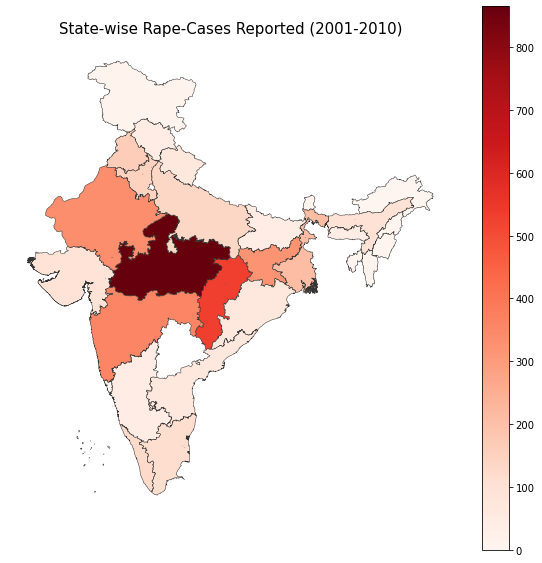

In [4]:
g1 = pd.DataFrame(inc_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','Cases Reported']
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


- Top 3 states having highest number of cases - **Madhya Pradhesh, Chhatisgarh, Rajasthan**
- Top 3 states having lowest number of cases - **Tripura, Manipur, Goa**

### Distribution of age groups of victims <a class="anchor" id="section_1_3"></a>

In [5]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show()

- Women between the age group of **18-30** have been **most** affected
- Women between the age group **above 50** have been **least** affected

## Human Rights violation by the Police <a class="anchor" id="chapter2"></a>

**Human Rights** in India is an issue complicated by the country's large size and population, widespread poverty, lack of proper education, as well as its diverse culture, despite its status as the world's largest sovereign, secular, democratic republic.

### State/UT wise cases registered under Human Rights violation from 2001 to 2010 <a class="anchor" id="section_2_1"></a>

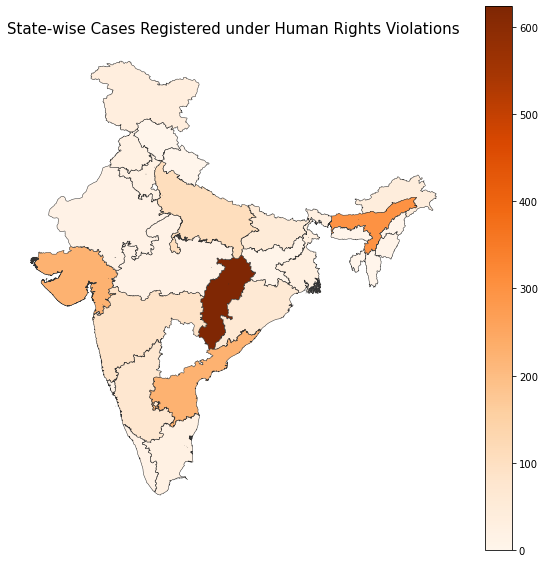

In [6]:
g2 = pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g2.columns = ['State/UT','Cases Reported']

g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g2.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Cases Registered under Human Rights Violations',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


- Top 3 states with **highest** number of cases against police **Chhatisgrah, Assam, Gujarat**
- Top 3 states with **lowest** number of cases against police **Manipur, Uttarakhand, Goa**

### Cases registered against Police under Human Rights violations from 2001 to 2010 <a class="anchor" id="section_2_2"></a>

In [7]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']

fig = px.bar(g3,x='Year',y='Cases Registered',color_discrete_sequence=['green'])
fig.show()

- In **2008**, highest number of cases were recorded - **506**
- The year **2006** recorded **least** number of cases i.e **58**

### Types of Human Rights violations <a class="anchor" id="section_2_3"></a>

In [8]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Torture                                    190
HR_Extortion                                  190
HR_Disappearance of Persons                   190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

#### Cases have been registered under the following heads:

1) Torture

2) Extortion 

3) Disappearance of Persons

4) Atrocities on SC/ST

5) Illegal detention/arrests

6) Indignity to Women

7) Fake encounter killings

8) False implication

9) Violation against terrorists/extremists

10) Failure in taking action 

11) Other violations

### Cases Registed under Human Rights Violation -  Fake encounter killings <a class="anchor" id="section_2_4"></a>

In [9]:
fake_enc_df = police_hr[police_hr['Group_Name']=='HR_Fake encounter killings'] 
fake_enc_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

### Cases Registed under Human Rights Violation -  False implication <a class="anchor" id="section_2_4_1"></a>

In [10]:
false_imp_df = police_hr[police_hr['Group_Name']=='HR_False implication'] 
false_imp_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

### Policemen Chargesheeted vs Policemen Convicted <a class="anchor" id="section_2_5"></a>

In [11]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Policemen Chargesheeted', x=year, y=g4['Policemen_Chargesheeted'],
           marker_color='purple'),
    go.Bar(name='Policemen Convicted', x=year, y=g4['Policemen_Convicted'],
          marker_color='red')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of policemen')
fig.show()

- In 2009, **69.87%** of policemen have been convicted - highest of the decade.
- For about **three** consecutive years, **2005, 2006, 2007** there has been **no** conviction of policemen.

## Auto Theft cases <a class="anchor" id="chapter3"></a>

### State/UT wise number of vehicles stolen from 2001 to 2010 <a class="anchor" id="section_3_1"></a>

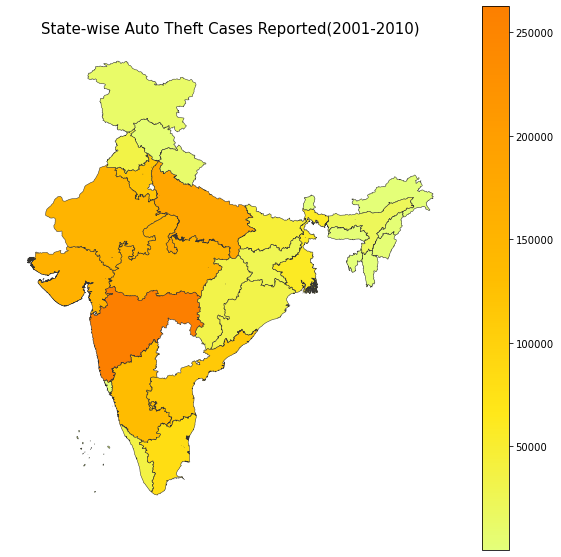

In [12]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


- Top 3 states with highest number of auto theft cases **Maharashtra, Uttar Pradesh,Gujarat**
- Top 3 states with lowest number of auto theft cases **Sikkim, Mizoram, Tripura**

### Proportion of vehicles stolen, traced and recovered <a class="anchor" id="section_3_2"></a>

In [13]:
auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

colors = ['crimson','gold','green']

fig = go.Figure(data=[go.Pie(labels=vehicle_group, values=vehicle_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

- Out of **2,467,182** vehicles stolen, **21.2%** have been recovered.

### Year wise vehicles stolen <a class="anchor" id="section_3_3"></a>

In [14]:
g5 = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())

g5.columns = ['Year','Vehicles Stolen']

fig = px.bar(g5,x='Year',y='Vehicles Stolen',color_discrete_sequence=['#17becf'])
fig.show()

- There seems to be **linear** growth of vehicles stolen.
- At this rate by the end of **2020**, there will be approxiately **460k** vehicles stolen.

### Types of vehicles stolen <a class="anchor" id="section_3_4"></a>

In [15]:
vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

sr_no = [1,2,3,4,5]

fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[sr_no,vehicle_list],
                            height=30))
                     ])
fig.show()

### Top 10 States/UT with highest number of motor cycles stolen <a class="anchor" id="section_3_5"></a>

In [16]:
motor_c = auto_theft[auto_theft['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g8 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g8_sorted = g8.sort_values(['Auto_Theft_Stolen'],ascending=True)
fig = px.bar(g8_sorted.iloc[-10:,:], y='Area_Name', x='Auto_Theft_Stolen',
             orientation='h',color_discrete_sequence=['#008080'])
fig.show()

- **Maharashtra** has the most cases of vehicles stolen - over **103k**

### Property theft cases <a class="anchor" id="chapter4"></a>

### State/UT wise number of property stolen cases from 2001 to 2010 <a class="anchor" id="section_4_1"></a>

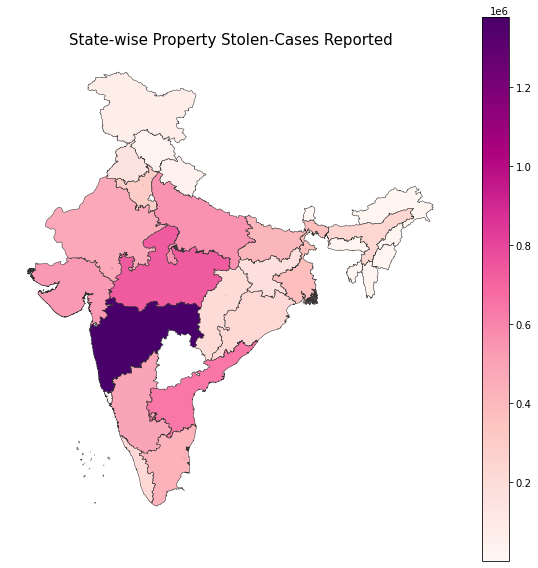

In [17]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases Reported']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g7.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### Types of property stolen cases <a class="anchor" id="section_4_2"></a>

**Cases have been registered under the following heads:**

1) Dacoity

2) Criminal Breach of Trust

3) Robbery

4) Burglary

5) Theft

6) Others

### Property stolen vs recovered <a class="anchor" id="section_4_3"></a>

In [18]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_group = ['Property Stolen Cases','Property Recovered Cases']
prop_vals = [prop_theft_stolen,prop_theft_recovered]

colors = ['red','green']

fig = go.Figure(data=[go.Pie(labels=prop_group, values=prop_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

### Year-wise Value of Property Stolen and Recovered <a class="anchor" id="section_4_4"></a>

In [19]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered'],
           marker_color='gold'),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Value in Rupees',
                 title='Year-wise Value of Property Stolen and Recovered')
fig.show()

### There are still a lot of factors to analyze. I will update more in the next version...